In [1]:
import adapml_chemometrics
import adapml_data

# Read Data

In [2]:
path_to_data = 'C:\\Users\\csa97\\Research\\Projects\\DuLab\\ADAP-ML\\adap-ml\\data\\SCLC_study_output_filtered_2.csv'
path_to_resp = 'C:\\Users\\csa97\\Research\\Projects\\DuLab\\ADAP-ML\\adap-ml\\data\\SCLC_study_responses_2.csv'

data = adapml_data.DataImport(path_to_data)
response1D = adapml_data.DataImport.getResponse(path_to_resp);
response2D = adapml_data.DataImport.getDummyResponse(response1D);

variables = data.getVariableNames()
samples = data.getSampleNames()


# Normalize Data

In [3]:
data.normalizeData()

# Principal Component Analysis

In [4]:
pca = adapml_chemometrics.Chemometrics(data.data, "pca", response1D)

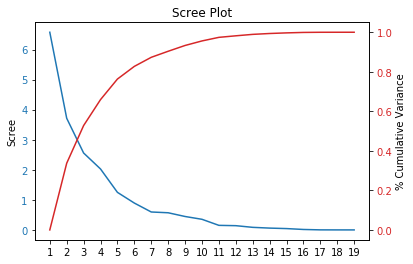

In [5]:
pca.plotScree(num_modes=19)

Projections of data into latent space.
Data is colored by response


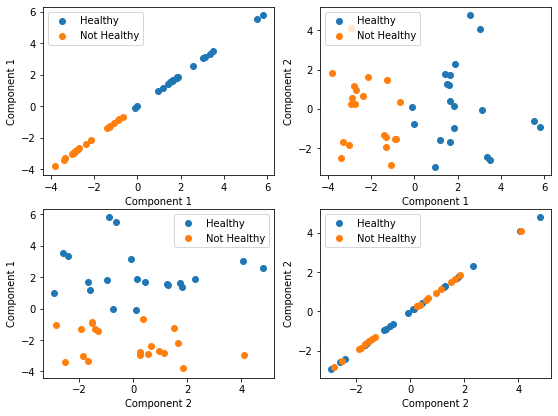

In [6]:
pca.plotProjectionScatterMultiClass(2, labels=["Healthy", "Not Healthy"])

Plotting the squared loadings of the latent space transformation vectors
A Larger magnitude indicates larger importance for corresponding feature


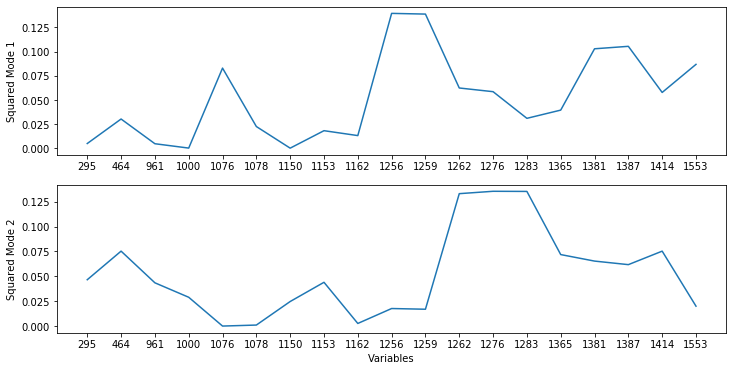

In [7]:
pca.plotVectorLoadings(variables, 2)

# Partial Least Squares - Discriminant Analysis

In [8]:
plsda = adapml_chemometrics.Chemometrics(data.data, "pls-da", response1D, kfolds=10)
print("Cross Validations s:"+str(plsda.cv_error))
print("Q^2 = "+str(plsda.getQ2()))
print("R^2 = "+str(plsda.R2))

Cross Validations s:[0.1787146  0.35659971 0.08465238 0.17920583 0.13930823 0.12482313
 0.2931518  0.24082782 0.17685433 0.24268161]
Q^2 = 0.6761496574785344
R^2 = 0.8214968736041712


Projections of data into latent space.
Data is colored by response


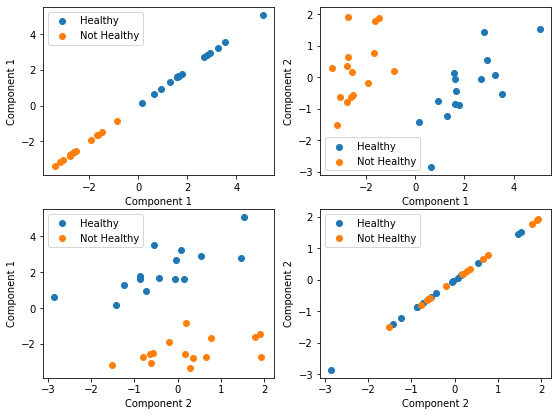

In [9]:
plsda.plotProjectionScatterMultiClass(2, labels=["Healthy", "Not Healthy"])

Plotting the squared loadings of the latent space transformation vectors
A Larger magnitude indicates larger importance for corresponding feature


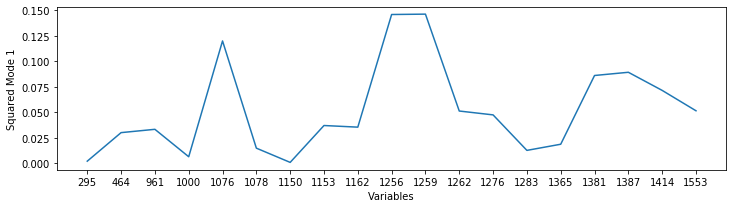

In [10]:
plsda.plotVectorLoadings(variables, 1)

VIP Scores for original features with cross validation errors
Average Cross Validation Error: 0.201681942846772


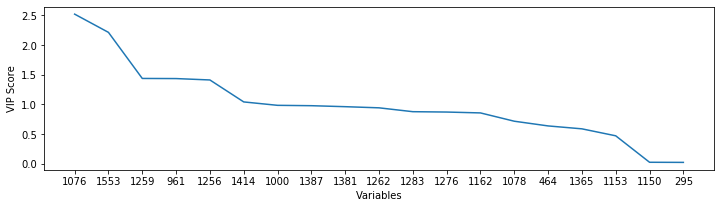

In [11]:
plsda.plotVIP(variables)

# Orthogonal Projections to Latent Spaces

In [12]:
opls = adapml_chemometrics.Chemometrics(data.data, "opls", response1D, kfolds=10, num_comp=2)
print("Cross Validation Errors: "+str(opls.cv_error))
print("Q^2 = "+str(opls.getQ2()))
print("R^2 = "+str(opls.R2))

Cross Validation Errors: [0.30051481 0.1589097  0.20244674 0.10751495 0.15221265 0.28814041
 0.2650804  0.33919917 0.30251293 0.19787898]
Q^2 = 0.15236526824604102
R^2 = -21.813190034314644


Projections of data into latent space.
Data is colored by response


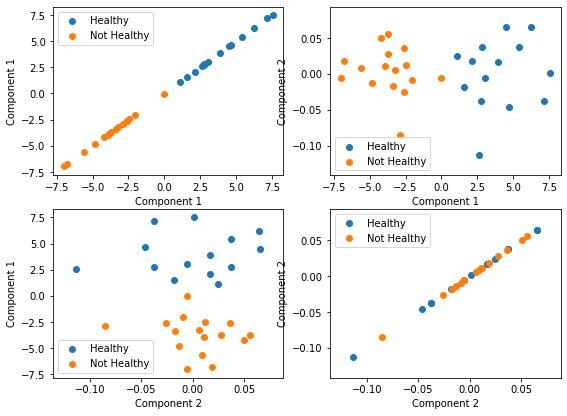

In [13]:
opls.plotProjectionScatterMultiClass(2, labels=["Healthy", "Not Healthy"])

Plotting the squared loadings of the latent space transformation vectors
A Larger magnitude indicates larger importance for corresponding feature


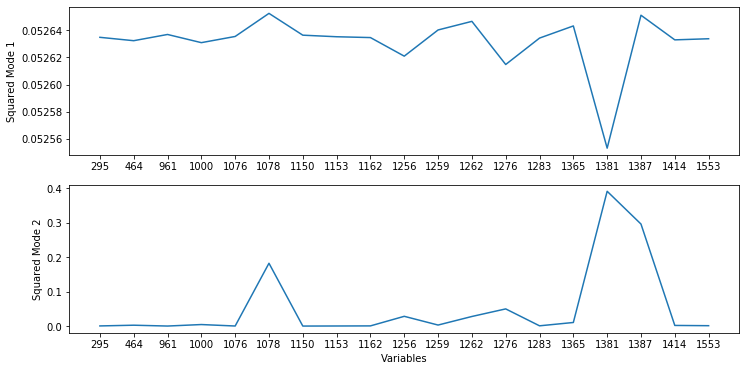

In [14]:
opls.plotVectorLoadings(variables, 2)

OPLS
VIP Scores for original features with cross validation errors
Average Cross Validation Error: 0.23144107482898182


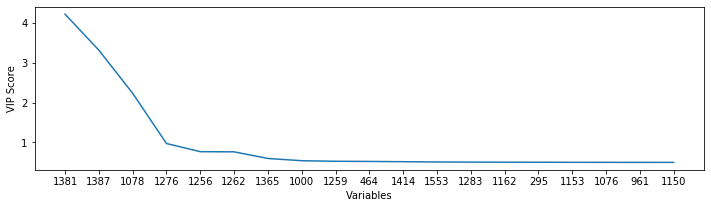

In [15]:
print("OPLS");
opls.plotVIP(variables)

# Linear Discriminant Anlaysis

In [16]:
lda = adapml_chemometrics.Chemometrics(data.data, "lda", response1D)
print("Q^2 = "+str(lda.getQ2()))
print("R^2 = "+str(lda.R2))

Q^2 = -inf
R^2 = 1.0


C:\Users\csa97\Research\Projects\DuLab\ADAP-ML\adap-ml\JupyterNotebooks\adapml_chemometrics.py:319: RuntimeWarning: divide by zero encountered in longlong_scalars
  Q2 = 1-(PRESS/TSS)


Projections of data into latent space.
Data is colored by response


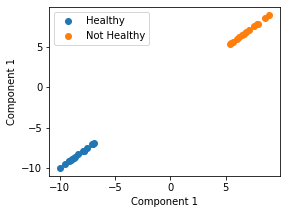

In [17]:
lda.plotProjectionScatterMultiClass(1, labels=["Healthy", "Not Healthy"])

Plotting the squared loadings of the latent space transformation vectors
A Larger magnitude indicates larger importance for corresponding feature


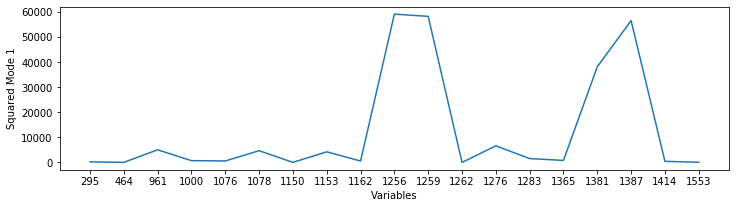

In [18]:
lda.plotVectorLoadings(variables, 1)